# Reducing Images with `seam_carve`

This section demonstrates how to use the `seam_carve` function to implement content-aware image reduction. The `seam_carve` function resizes an image to target dimensions by removing low-energy seams (paths of least importance).

This guide will demonstrate the usage and functionality of the `seam_carve` function through a series of practical examples.

## Importing Necessary Libraries

First, we will need to import the necessary libraries and load a grayscale and color (RGB) image to manipulate. We will use [`matplotlib`](https://matplotlib.org/stable/api/pyplot_summary.html) to display images and [`numpy`](https://numpy.org/) for array manipulations.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sharpedge.seam_carving import seam_carve

## Preparing Your Image

We'll define the sample images from [`scikit-image` library](https://scikit-image.org/docs/stable/api/skimage.html). The image used is the [`astronaut` image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.astronaut).

### Example: RGB Astronaut Image

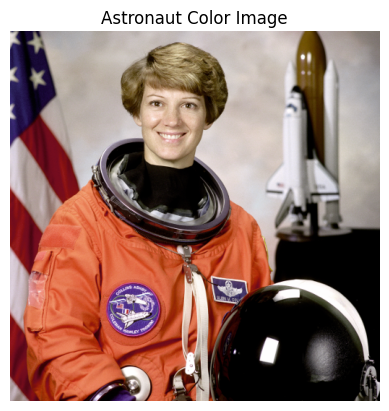

In [6]:
# Load the astronaut color image from scikit-image
rgb_img = data.astronaut()

# Display the image
plt.imshow(rgb_img)
plt.title("Astronaut Color Image")
plt.axis('off') 
plt.show()

In [7]:
# Display shape and exact numpy array
print(f'Astronaut color image in 3D: {np.shape(rgb_img)}')
print(rgb_img)

Astronaut color image in 3D: (512, 512, 3)
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]


## Applying the `seam_carve` function

We can now apply the `seam_carve` function to resize our image to a smaller dimensions. You can customize the desired height and width of the target image by assigning the `target_height` and `target_width`.

> Note: Both `target_height` and `target_width` should be no greater than the height and width of the original image.

### Reduce the Height of the Image

Let's reduce only the height of the image by setting `target_height` to `450` while keeping the `target_width` unchanged at its original value of `512`. 

> You should encounter a UserWarning stating, "Target width is the same as the original width". This is expected and indicates that no width adjustment will be made during the process.

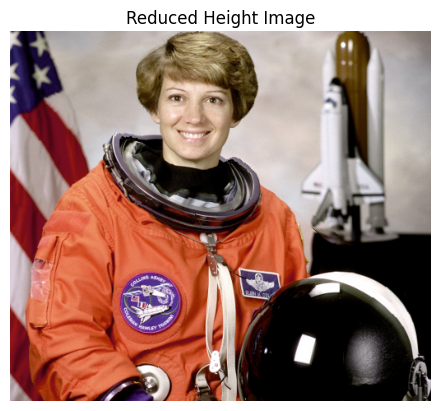

Original Dimensions: (512, 512) (Height x Width)
Resized Dimensions: (450, 512) (Height x Width)


In [9]:
# Apply seam carving to resize the image.
# Target dimensions:
# - Height: 450 pixels.
# - Width: 512 pixels (same as original width, no change).
seam_carved_height_img = seam_carve(
    img=rgb_img, 
    target_height=450, 
    target_width=512
)

# Display the resized image
plt.imshow(seam_carved_height_img)
plt.title('Reduced Height Image')
plt.axis('off')
plt.show()

# Check the dimensions of the original and resized images
print(f'Original Dimensions: {rgb_img.shape[:2]} (Height x Width)')
print(f'Resized Dimensions: {seam_carved_height_img.shape[:2]} (Height x Width)')

### Reduce the Width of the Image

Let's trying recuding the width only this time by setting `target_width` to `450` while keeping the `target_height` unchanged at its original value of `512`. 

> Similarly, you should receive a UserWarning stating, "Target width is the same as the original width". This is expected and indicates that no width adjustment will be made during the process.

E:\2024-2025-UBC-MDS\Block_4\DSCI_524\project\2025-01-23-docs-seam-carve\SharpEdge\src\sharpedge\seam_carving.py:292: UserWarning: Target height is the same as the original height.
  warnings.warn("Target height is the same as the original height.", UserWarning)


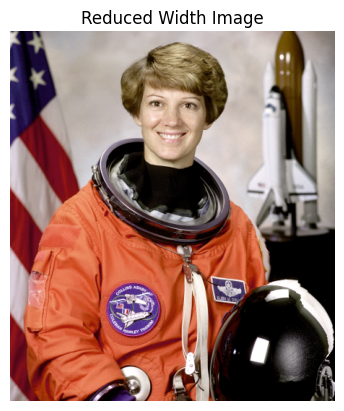

Original Dimensions: (512, 512) (Height x Width)
Resized Dimensions: (512, 450) (Height x Width)


In [10]:
# Apply seam carving to resize the image.
# Target dimensions:
# - Height: 512 pixels (same as original width, no change).
# - Width: 450 pixels.
seam_carved_width_img = seam_carve(img=rgb_img, target_height=512, target_width=450)

# Display the resized image
plt.imshow(seam_carved_width_img)
plt.title('Reduced Width Image')
plt.axis('off')
plt.show()

# Check the dimensions of the original and resized images
print(f'Original Dimensions: {rgb_img.shape[:2]} (Height x Width)')
print(f'Resized Dimensions: {seam_carved_width_img.shape[:2]} (Height x Width)')